<a href="https://colab.research.google.com/github/NguyenKiet2k2/AI/blob/main/20146500_Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
%cd /content/drive/MyDrive/FACE

/content/drive/MyDrive/FACE


In [4]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [22]:
# Tạo bộ dữ liệu training set
training_set=train.flow_from_directory('/content/drive/MyDrive/FACE/FACE_train', target_size=(30,40), batch_size=32, class_mode='categorical')

Found 622 images belonging to 14 classes.


In [23]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'BAO THAI': 0,
 'CHI LOC': 1,
 'DUY NHAT': 2,
 'FACE_test': 3,
 'HOAI PHONG': 4,
 'NGOC HIEU': 5,
 'NGUYEN HOANG': 6,
 'NHUT SANG': 7,
 'QUANG PHUC': 8,
 'QUOC TRUNG': 9,
 'TAN DAT': 10,
 'TAN PHAT': 11,
 'TRONG LUAN': 12,
 'VIET HA': 13}

In [27]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(30,40,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(14,activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                  

In [28]:
# Gán biến lại để vẽ đồ thị, với 60 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), 
# khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_set,epochs=30,batch_size=128,verbose=1)


Epoch 1/30
20/20 [==============================] - 4s 147ms/step - loss: 2.7298 - accuracy: 0.2331
Epoch 2/30
20/20 [==============================] - 3s 135ms/step - loss: 0.9370 - accuracy: 0.7605
Epoch 3/30
20/20 [==============================] - 3s 139ms/step - loss: 0.3393 - accuracy: 0.9051
Epoch 4/30
20/20 [==============================] - 3s 132ms/step - loss: 0.1665 - accuracy: 0.9518
Epoch 5/30
20/20 [==============================] - 3s 132ms/step - loss: 0.1087 - accuracy: 0.9727
Epoch 6/30
20/20 [==============================] - 5s 226ms/step - loss: 0.0628 - accuracy: 0.9823
Epoch 7/30
20/20 [==============================] - 3s 135ms/step - loss: 0.0922 - accuracy: 0.9823
Epoch 8/30
20/20 [==============================] - 3s 131ms/step - loss: 0.0677 - accuracy: 0.9887
Epoch 9/30
20/20 [==============================] - 3s 162ms/step - loss: 0.0514 - accuracy: 0.9871
Epoch 10/30
20/20 [==============================] - 3s 130ms/step - loss: 0.0711 - accuracy: 0.9855

In [29]:
model.save('/content/drive/MyDrive/FACE/FACE_train/FACE_train.h5')

In [30]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.014500831253826618
Train Accuracy 0.9967845678329468


<function matplotlib.pyplot.show(close=None, block=None)>

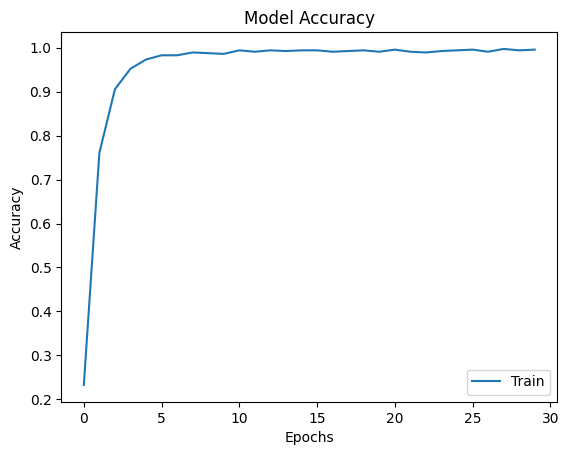

In [31]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show

In [33]:
model1= load_model('/content/drive/MyDrive/FACE/FACE_train/FACE_train.h5')

1/1 [==============================] - 0s 124ms/step
Đây là : Hoang Tan Dat


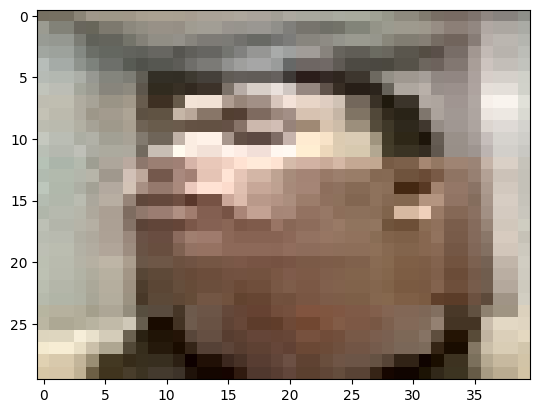

1/1 [==============================] - 0s 28ms/step
Đây là : Nguyen Chi Loc


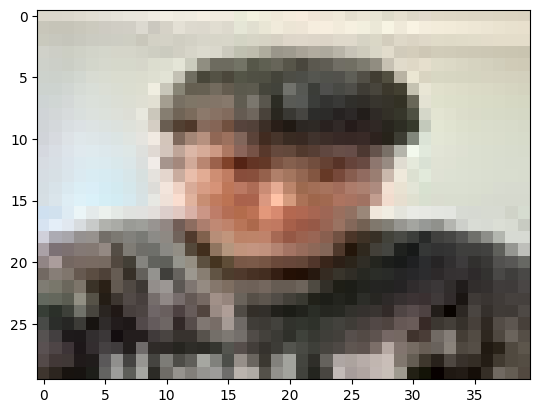

1/1 [==============================] - 0s 21ms/step
Đây là : 


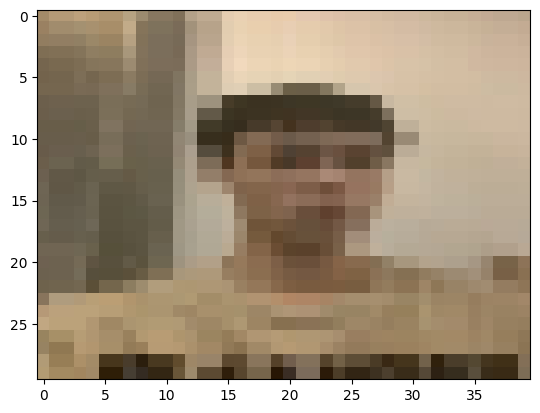

In [34]:
test="/content/drive/MyDrive/FACE/FACE_train/FACE_test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(30,40))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['Tran Nguyen Bao Thai','Nguyen Chi Loc','Phan Duy Nhat','','Pham Hoai Phong','Trần Ngọc Hiểu','Doan Nguyen Hoang','Ngo Nhut Sang','Nguyen Quang Phuc','Vi Quoc Trung', 'Hoang Tan Dat','Nguyen Tan Phat', 'Vo Trong Luan', 'Nguyen Viet Ha']
  print('Đây là : {}'.format(class_name[result]))
  plt.show()
